In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib
import os
from google.colab import files

In [ ]:
#import data set from the file upload
print("Please upload the 'Employee.csv' file.")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Please upload the 'Employee.csv' file.


Saving Employee.csv to Employee.csv


In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
#print data frame information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
#print the data describe
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [ ]:
#check the missing values
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


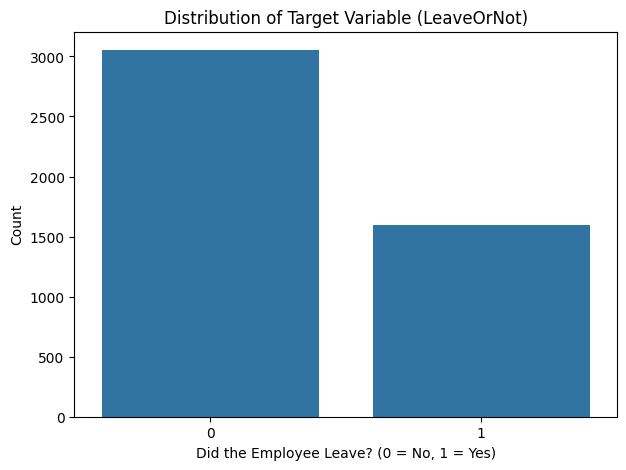


Target Variable Distribution:
LeaveOrNot
0    0.656136
1    0.343864
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='LeaveOrNot', data=df)
plt.title('Distribution of Target Variable (LeaveOrNot)')
plt.xlabel('Did the Employee Leave? (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

print("\nTarget Variable Distribution:")
print(df['LeaveOrNot'].value_counts(normalize=True))

In [ ]:
#split the target and features
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

In [ ]:
# get the categorical and numeric features
categorical_features = ['Education', 'City', 'PaymentTier', 'Gender', 'EverBenched']
numerical_features = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% of the data will be used for testing
    random_state=42,    # Ensures reproducibility
    stratify=y          # Ensures the same proportion of target classes in train/test sets
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (3722, 8)
Testing data shape: (931, 8)


In [ ]:
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("✅ Preprocessing pipeline created successfully.")

✅ Preprocessing pipeline created successfully.


              precision    recall  f1-score   support

           0       0.76      0.90      0.82       611
           1       0.71      0.46      0.56       320

    accuracy                           0.75       931
   macro avg       0.73      0.68      0.69       931
weighted avg       0.74      0.75      0.73       931



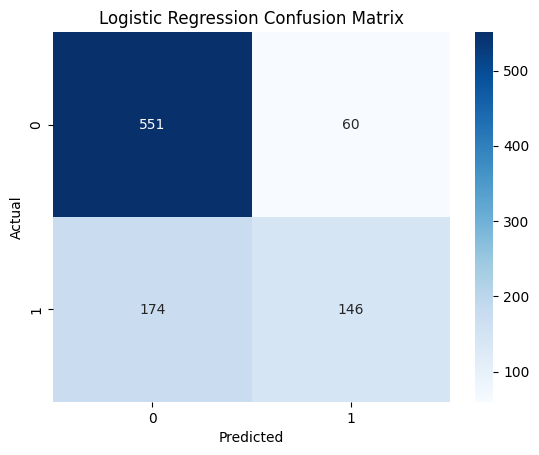

In [ ]:
# Create the full pipeline: preprocessor + model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_lr))

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Training complete.

--- Decision Tree Evaluation ---
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       611
           1       0.75      0.64      0.69       320

    accuracy                           0.80       931
   macro avg       0.79      0.77      0.78       931
weighted avg       0.80      0.80      0.80       931



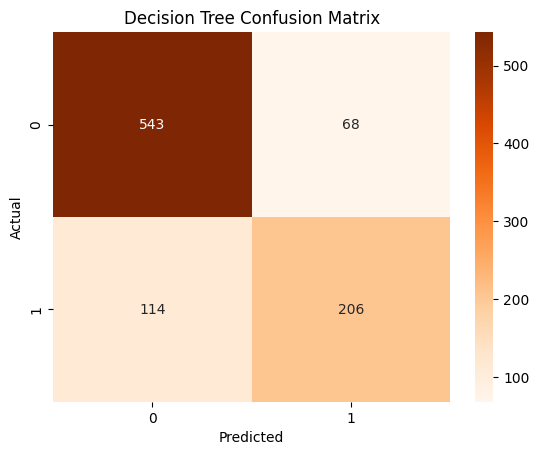

In [ ]:
# Create the full pipeline
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])

dt_pipeline.fit(X_train, y_train)
print("Training complete.")

y_pred_dt = dt_pipeline.predict(X_test)

# Evaluate the model
print("\n--- Decision Tree Evaluation ---")
print(classification_report(y_test, y_pred_dt))

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- Random Forest Evaluation ---
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       611
           1       0.82      0.66      0.73       320

    accuracy                           0.83       931
   macro avg       0.83      0.79      0.80       931
weighted avg       0.83      0.83      0.83       931



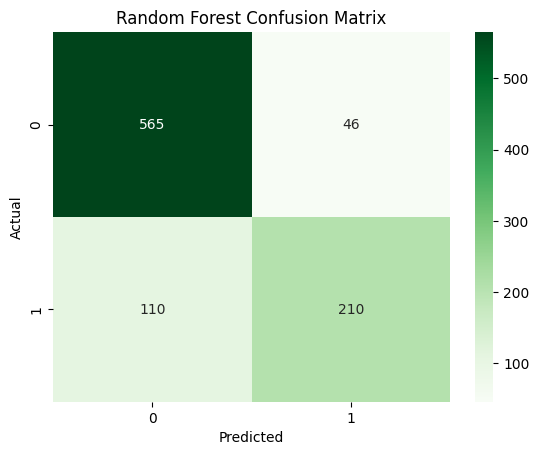

In [ ]:
# Create the full pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
print("\n--- Random Forest Evaluation ---")
print(classification_report(y_test, y_pred_rf))

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

model_performance = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'F1-Score (class 1)': [
        f1_score(y_test, y_pred_lr, pos_label=1),
        f1_score(y_test, y_pred_dt, pos_label=1),
        f1_score(y_test, y_pred_rf, pos_label=1)
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
}


performance_df = pd.DataFrame(model_performance).sort_values(by='F1-Score (class 1)', ascending=False)

print("--- Model Performance Comparison ---")
print(performance_df)

print("\n🏆 BEST MODEL SELECTION 🏆")
print("Based on the F1-Score for predicting 'Leave' (class 1), the Random Forest Classifier is the best model for this task.")

--- Model Performance Comparison ---
                 Model  F1-Score (class 1)  Accuracy
2        Random Forest            0.729167  0.832438
1        Decision Tree            0.693603  0.804511
0  Logistic Regression            0.555133  0.748657

🏆 BEST MODEL SELECTION 🏆
Based on the F1-Score for predicting 'Leave' (class 1), the Random Forest Classifier is the best model for this task.


In [ ]:
#save the more best model
best_model_pipeline = rf_pipeline
filename = 'employee_attrition_model.joblib'
joblib.dump(best_model_pipeline, filename)

['employee_attrition_model.joblib']

In [ ]:
#inference function to make the single prediction from the best model

model_filename = 'employee_attrition_model.joblib'
if not os.path.exists(model_filename):
    print(f"Error: Model file '{model_filename}' not found.")
else:
    loaded_model = joblib.load(model_filename)
    print(f"✅ Model '{model_filename}' loaded successfully.")

    # new_employee_data = {
    #     'Education': 'gcvgbh',
    #     'JoiningYear': 2000,
    #     'City': 'Pune',
    #     'PaymentTier': 0,
    #     'Age': 10,
    #     'Gender': 'Female',
    #     'EverBenched': 'No',
    #     'ExperienceInCurrentDomain': 3
    # }
    new_employee_data = {
      "Education": "Masters",
      "JoiningYear": 2013,
      "City": "Bangalore",
      "PaymentTier": 1,
      "Age": 38,
      "Gender": "Male",
      "EverBenched": "No",
      "ExperienceInCurrentDomain": 7
    }
    new_employee_df = pd.DataFrame([new_employee_data])
    print(new_employee_df)


    def predict_employee_leave(data, model):
        prediction = model.predict(data)
        probabilities = model.predict_proba(data)
        return prediction[0], probabilities[0]


    prediction, probabilities = predict_employee_leave(new_employee_df, loaded_model)

    # 5. Interpret and display the results
    leave_probability = probabilities[1] * 100
    if prediction == 1:
        print(f"Outcome: The model predicts that the employee will LEAVE.")
    else:
        print(f"Outcome: The model predicts that the employee will STAY.")

    print(f"Confidence (Probability of Leaving): {leave_probability:.2f}%")

✅ Model 'employee_attrition_model.joblib' loaded successfully.
  Education  JoiningYear       City  PaymentTier  Age Gender EverBenched  \
0   Masters         2013  Bangalore            1   38   Male          No   

   ExperienceInCurrentDomain  
0                          7  
Outcome: The model predicts that the employee will STAY.
Confidence (Probability of Leaving): 42.50%
